In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

In [2]:
df = pd.read_csv("Customer Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
df.drop("customerID", axis=1, inplace=True)

In [5]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [6]:
df_no_churn = df[df["Churn"] == "No"]
df_churn = df[df["Churn"] == "Yes"]

In [7]:
df_no_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [8]:
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [9]:
print("Percentage of people Churning is ", round((len(df_churn)/len(df))*100, 2), "%")
print("Percentage of people not Churning is ", round((len(df_no_churn)/len(df))*100, 2), "%")

Percentage of people Churning is  26.54 %
Percentage of people not Churning is  73.46 %


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [13]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [14]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"] = df["TotalCharges"].fillna(df["Contract"].map({"Month-to-month": 1, "One year": 12, "Two year": 24}) * df["MonthlyCharges"])

In [15]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [16]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


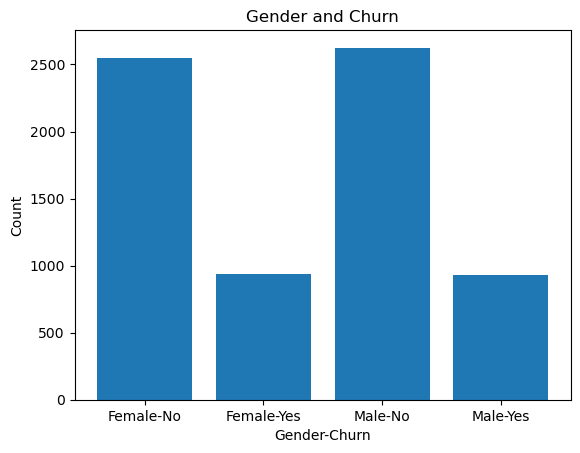

In [18]:
count_data = df.groupby(["gender", "Churn"]).size().reset_index(name="Count")

plt.bar(count_data["gender"] + "-" + count_data["Churn"], count_data["Count"])
plt.xlabel("Gender-Churn")
plt.ylabel("Count")
plt.title("Gender and Churn")
plt.xticks()
plt.show()

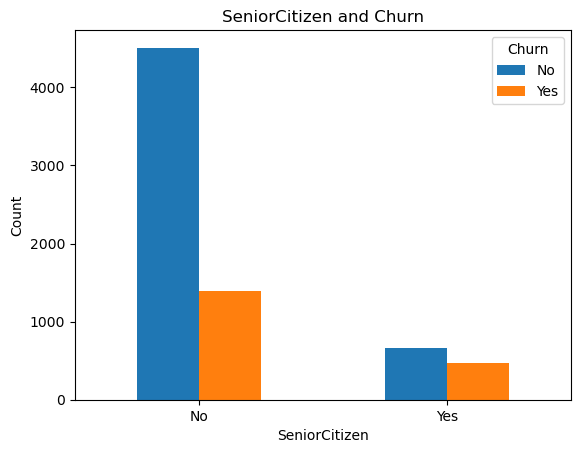

In [19]:
count_data = df.groupby(["SeniorCitizen", "Churn"]).size().reset_index(name="Count")
pivot_data = count_data.pivot(index="SeniorCitizen", columns="Churn", values="Count")
pivot_data.plot(kind="bar", stacked=False)
plt.xlabel("SeniorCitizen")
plt.ylabel("Count")
plt.title("SeniorCitizen and Churn")
plt.xticks(range(2), ["No", "Yes"], rotation=0)
plt.show()

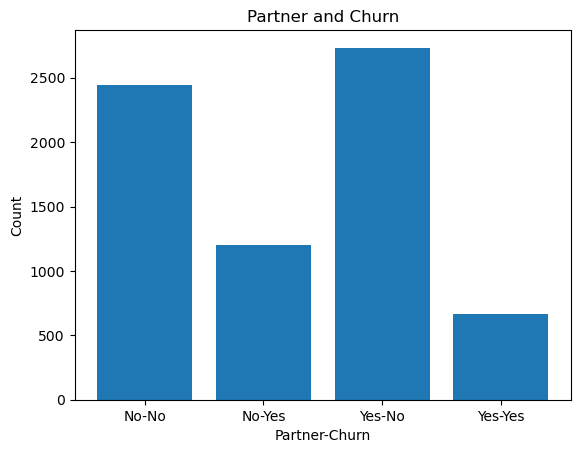

In [20]:
count_data = df.groupby(["Partner", "Churn"]).size().reset_index(name="Count")

plt.bar(count_data["Partner"] + "-" + count_data["Churn"], count_data["Count"])
plt.xlabel("Partner-Churn")
plt.ylabel("Count")
plt.title("Partner and Churn")
plt.xticks()
plt.show()

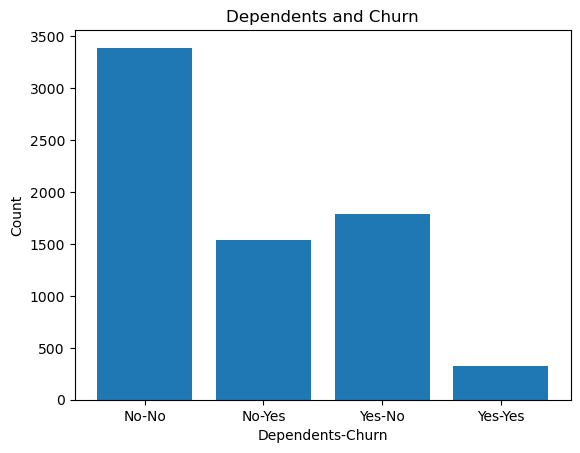

In [21]:
count_data = df.groupby(["Dependents", "Churn"]).size().reset_index(name="Count")

plt.bar(count_data["Dependents"] + "-" + count_data["Churn"], count_data["Count"])
plt.xlabel("Dependents-Churn")
plt.ylabel("Count")
plt.title("Dependents and Churn")
plt.xticks()
plt.show()

<Figure size 5000x1000 with 0 Axes>

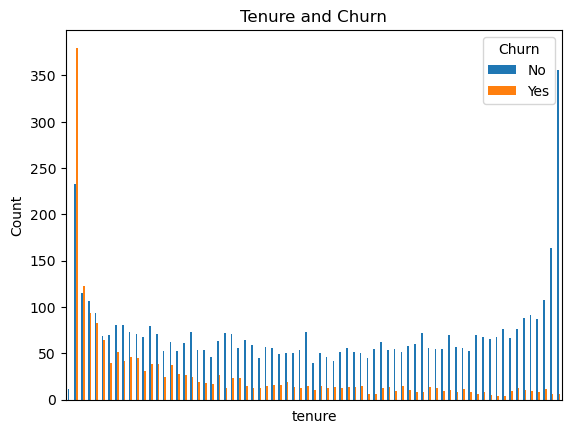

In [22]:
count_data = df.groupby(["tenure", "Churn"]).size().reset_index(name="Count")
pivot_data = count_data.pivot(index="tenure", columns="Churn", values="Count")
plt.figure(figsize=(50,10))
pivot_data.plot(kind="bar", stacked=False)
plt.xlabel("tenure")
plt.ylabel("Count")
plt.title("Tenure and Churn")
plt.xticks([])
plt.show()

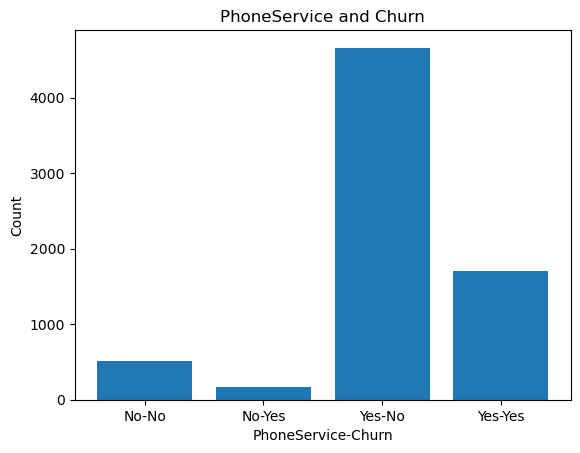

In [23]:
count_data = df.groupby(["PhoneService", "Churn"]).size().reset_index(name="Count")

plt.bar(count_data["PhoneService"] + "-" + count_data["Churn"], count_data["Count"])
plt.xlabel("PhoneService-Churn")
plt.ylabel("Count")
plt.title("PhoneService and Churn")
plt.xticks()
plt.show()

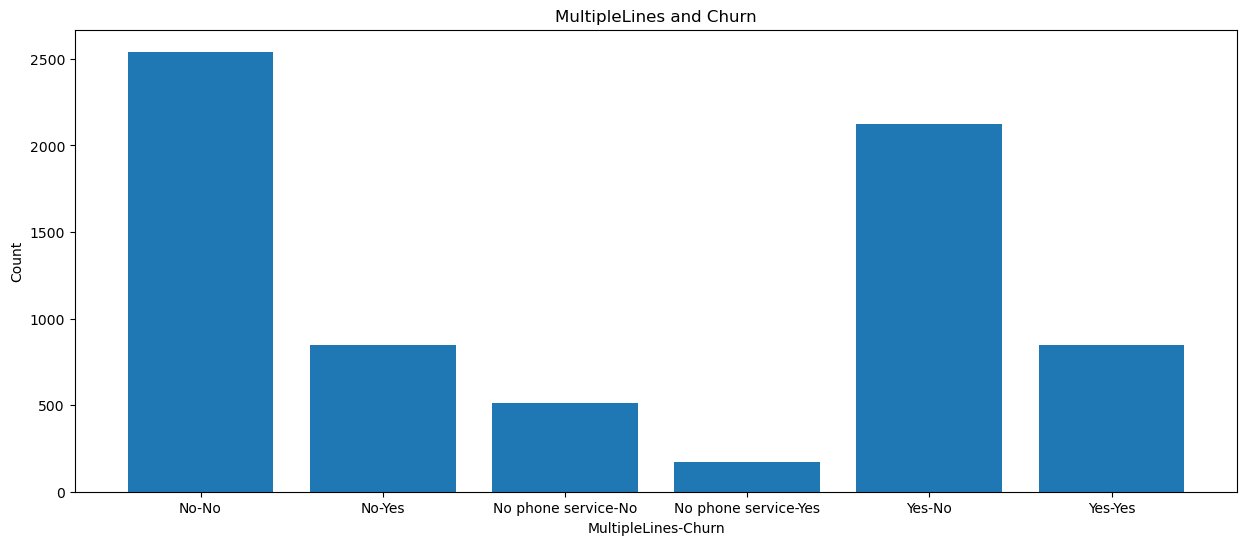

In [24]:
count_data = df.groupby(["MultipleLines", "Churn"]).size().reset_index(name="Count")
plt.figure(figsize=(15,6))
plt.bar(count_data["MultipleLines"] + "-" + count_data["Churn"], count_data["Count"])
plt.xlabel("MultipleLines-Churn")
plt.ylabel("Count")
plt.title("MultipleLines and Churn")
plt.xticks()
plt.show()

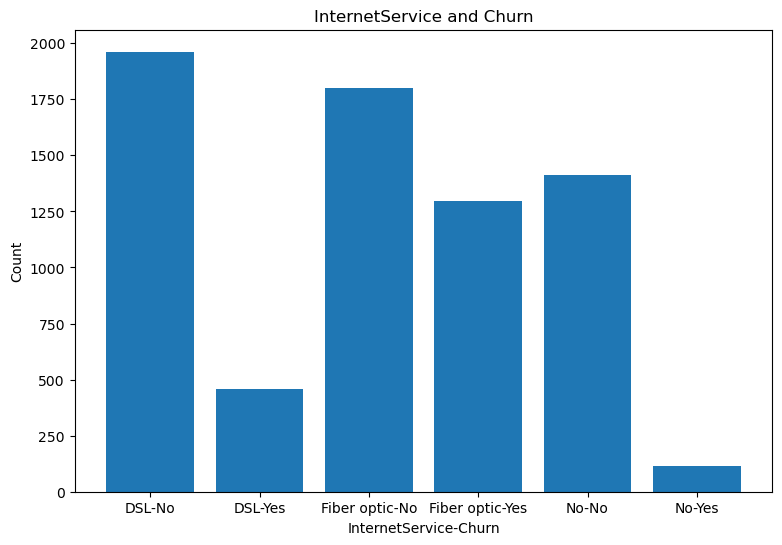

In [25]:
count_data = df.groupby(["InternetService", "Churn"]).size().reset_index(name="Count")
plt.figure(figsize=(9,6))
plt.bar(count_data["InternetService"] + "-" + count_data["Churn"], count_data["Count"])
plt.xlabel("InternetService-Churn")
plt.ylabel("Count")
plt.title("InternetService and Churn")
plt.xticks()
plt.show()

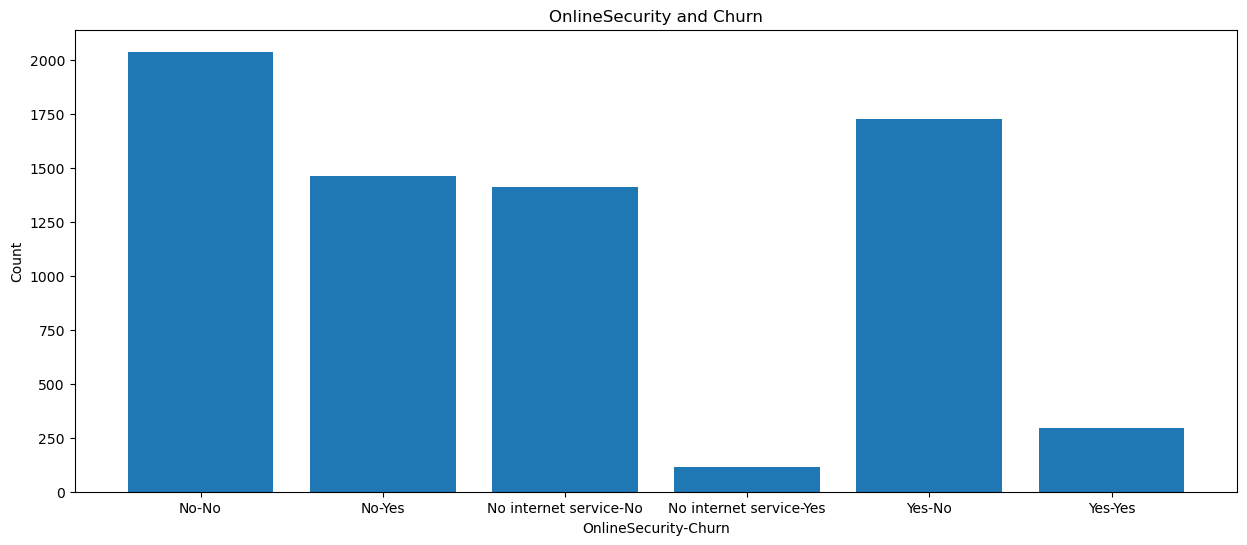

In [26]:
count_data = df.groupby(["OnlineSecurity", "Churn"]).size().reset_index(name="Count")
plt.figure(figsize=(15,6))
plt.bar(count_data["OnlineSecurity"] + "-" + count_data["Churn"], count_data["Count"])
plt.xlabel("OnlineSecurity-Churn")
plt.ylabel("Count")
plt.title("OnlineSecurity and Churn")
plt.xticks()
plt.show()

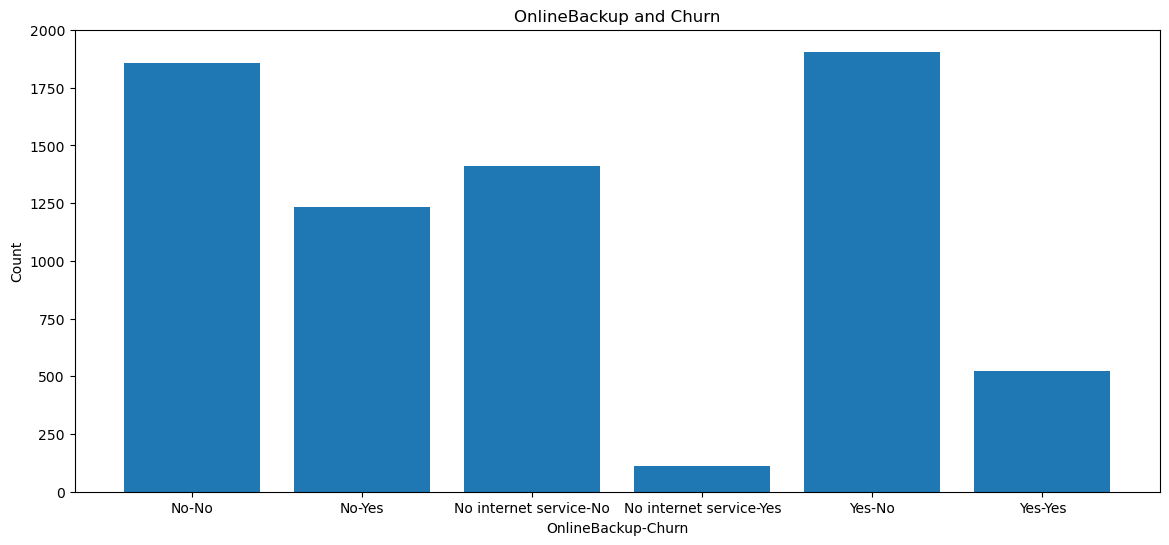

In [27]:
count_data = df.groupby(["OnlineBackup", "Churn"]).size().reset_index(name="Count")
plt.figure(figsize=(14,6))
plt.bar(count_data["OnlineBackup"] + "-" + count_data["Churn"], count_data["Count"])
plt.xlabel("OnlineBackup-Churn")
plt.ylabel("Count")
plt.title("OnlineBackup and Churn")
plt.xticks()
plt.show()

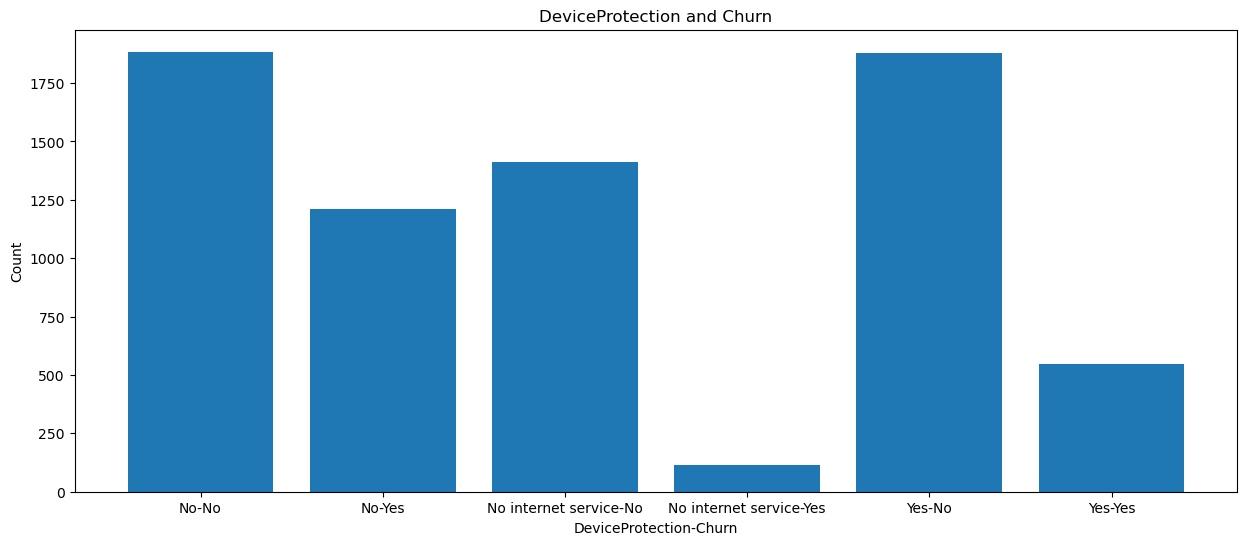

In [28]:
count_data = df.groupby(["DeviceProtection", "Churn"]).size().reset_index(name="Count")
plt.figure(figsize=(15,6))
plt.bar(count_data["DeviceProtection"] + "-" + count_data["Churn"], count_data["Count"])
plt.xlabel("DeviceProtection-Churn")
plt.ylabel("Count")
plt.title("DeviceProtection and Churn")
plt.xticks()
plt.show()

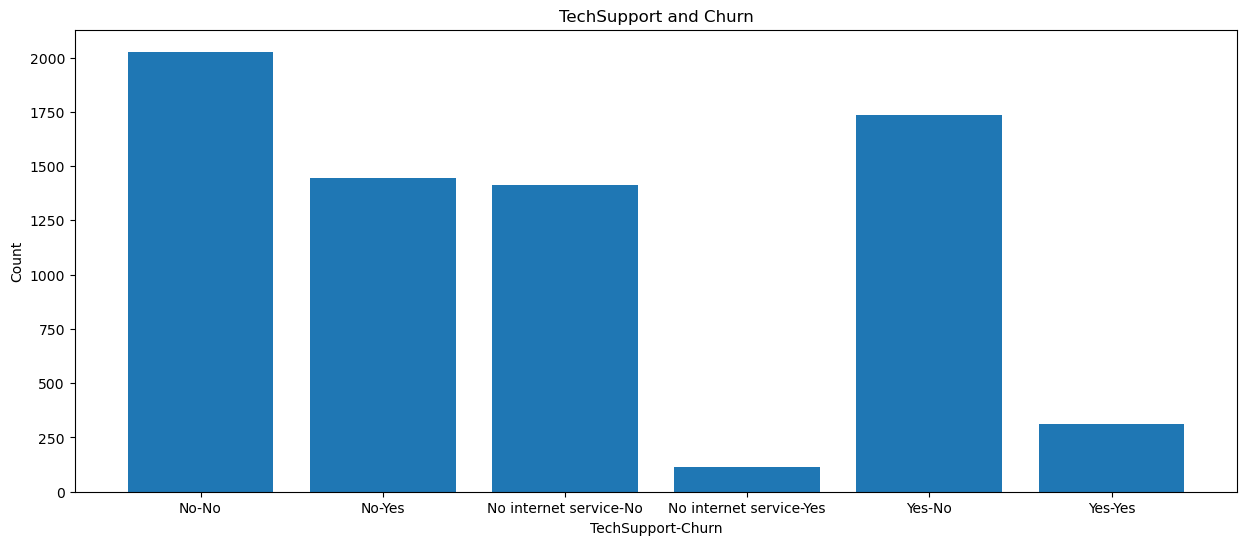

In [29]:
count_data = df.groupby(["TechSupport", "Churn"]).size().reset_index(name="Count")
plt.figure(figsize=(15,6))
plt.bar(count_data["TechSupport"] + "-" + count_data["Churn"], count_data["Count"])
plt.xlabel("TechSupport-Churn")
plt.ylabel("Count")
plt.title("TechSupport and Churn")
plt.xticks()
plt.show()

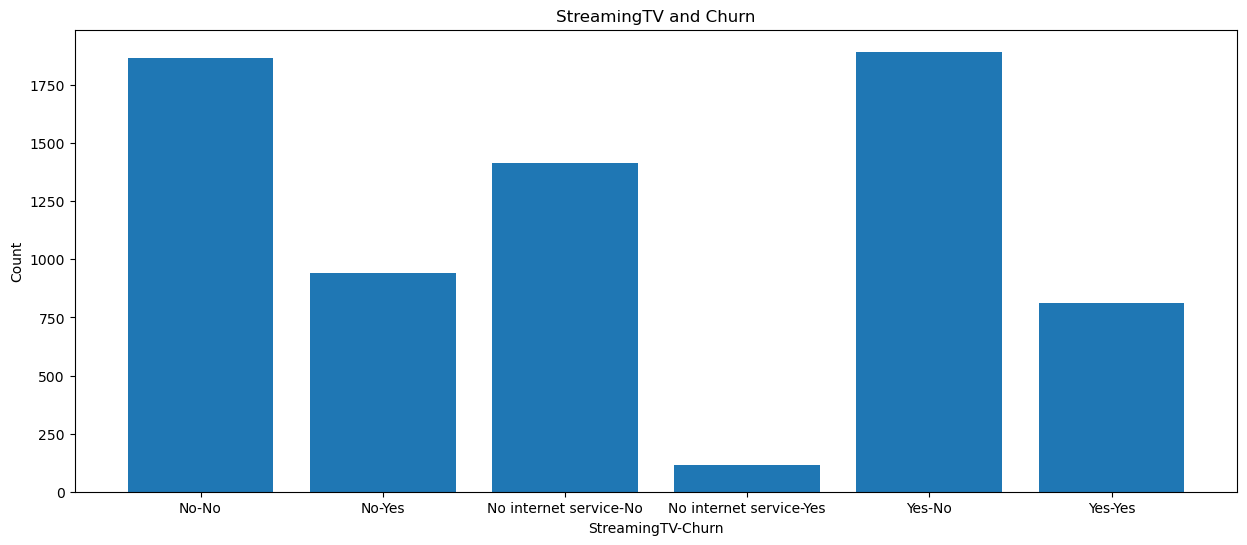

In [30]:
count_data = df.groupby(["StreamingTV", "Churn"]).size().reset_index(name="Count")
plt.figure(figsize=(15,6))
plt.bar(count_data["StreamingTV"] + "-" + count_data["Churn"], count_data["Count"])
plt.xlabel("StreamingTV-Churn")
plt.ylabel("Count")
plt.title("StreamingTV and Churn")
plt.xticks()
plt.show()

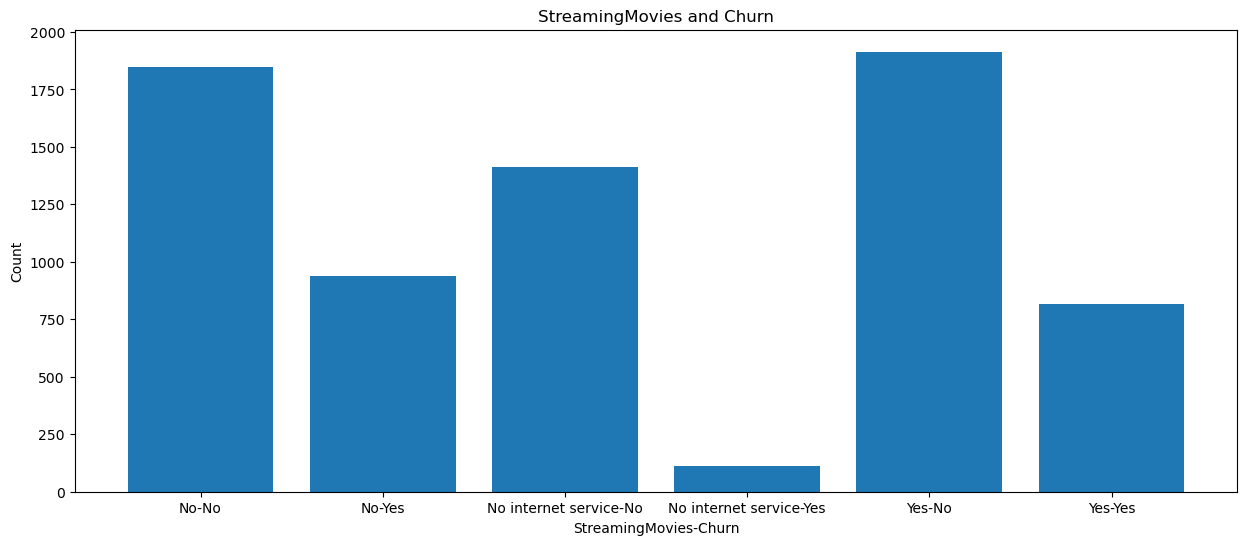

In [31]:
count_data = df.groupby(["StreamingMovies", "Churn"]).size().reset_index(name="Count")
plt.figure(figsize=(15,6))
plt.bar(count_data["StreamingMovies"] + "-" + count_data["Churn"], count_data["Count"])
plt.xlabel("StreamingMovies-Churn")
plt.ylabel("Count")
plt.title("StreamingMovies and Churn")
plt.xticks()
plt.show()

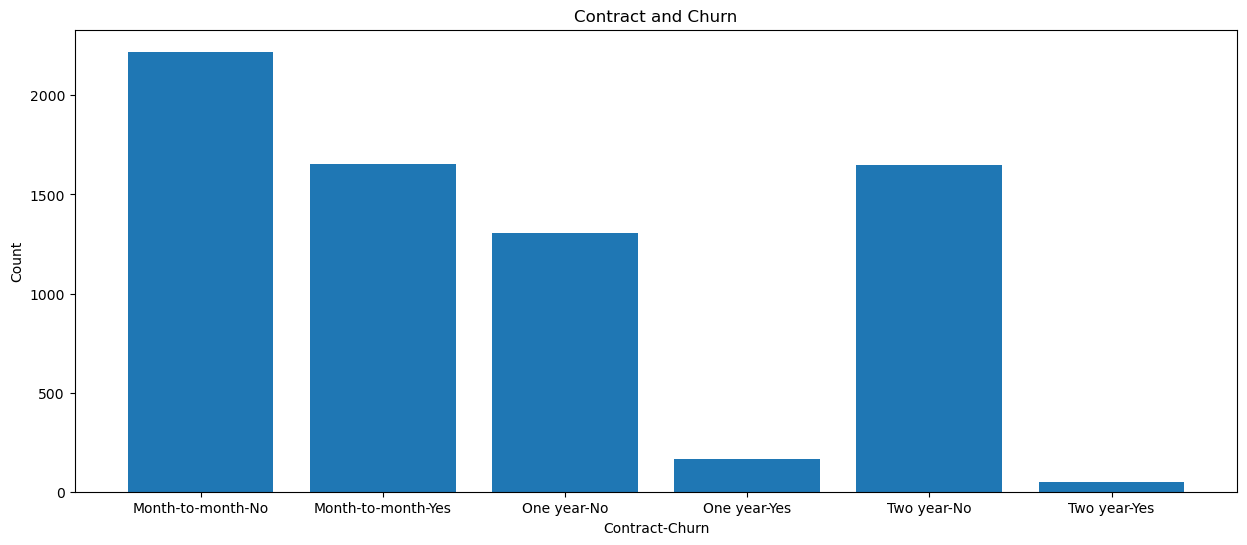

In [32]:
count_data = df.groupby(["Contract", "Churn"]).size().reset_index(name="Count")
plt.figure(figsize=(15,6))
plt.bar(count_data["Contract"] + "-" + count_data["Churn"], count_data["Count"])
plt.xlabel("Contract-Churn")
plt.ylabel("Count")
plt.title("Contract and Churn")
plt.xticks()
plt.show()

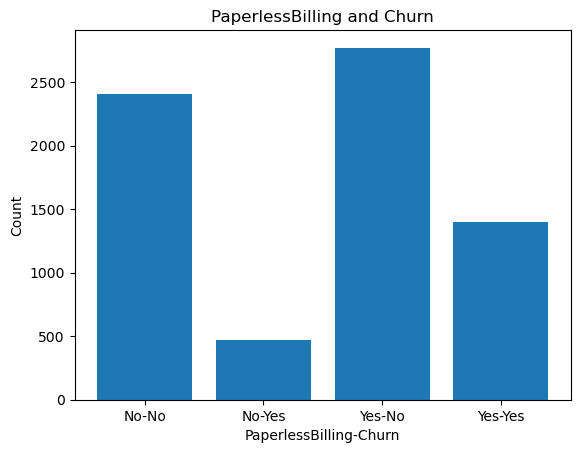

In [33]:
count_data = df.groupby(["PaperlessBilling", "Churn"]).size().reset_index(name="Count")

plt.bar(count_data["PaperlessBilling"] + "-" + count_data["Churn"], count_data["Count"])
plt.xlabel("PaperlessBilling-Churn")
plt.ylabel("Count")
plt.title("PaperlessBilling and Churn")
plt.xticks()
plt.show()

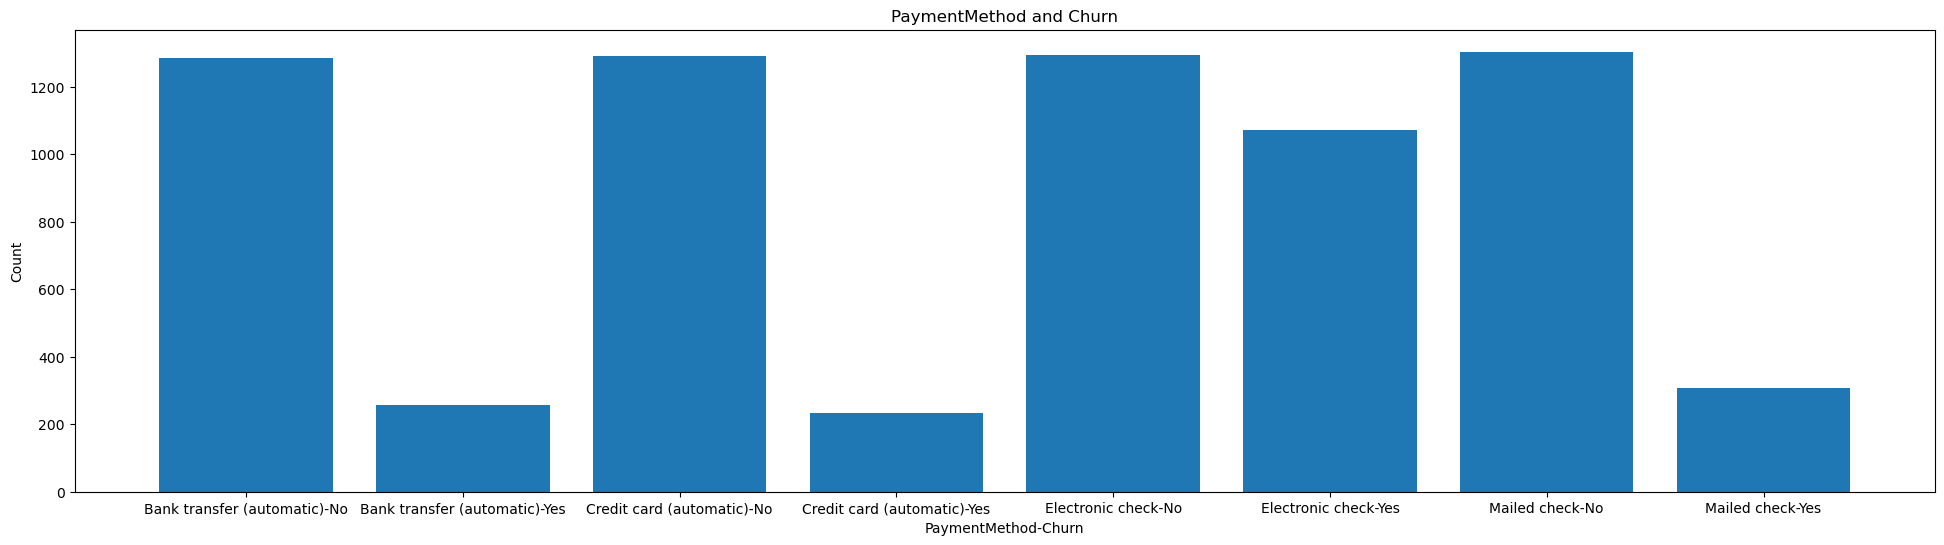

In [34]:
count_data = df.groupby(["PaymentMethod", "Churn"]).size().reset_index(name="Count")
plt.figure(figsize=(24,6))
plt.bar(count_data["PaymentMethod"] + "-" + count_data["Churn"], count_data["Count"])
plt.xlabel("PaymentMethod-Churn")
plt.ylabel("Count")
plt.title("PaymentMethod and Churn")
plt.xticks()
plt.show()

<Figure size 5000x1000 with 0 Axes>

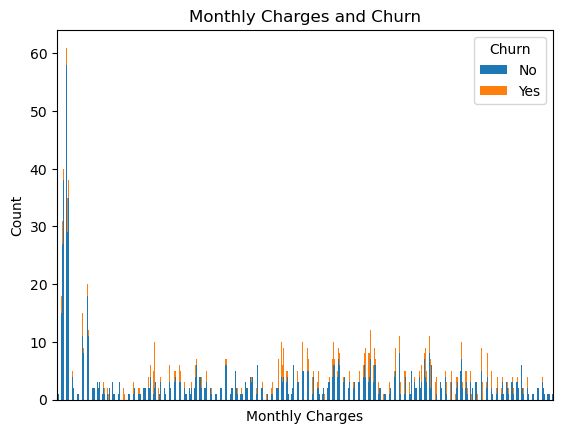

In [35]:
count_data = df.groupby(["MonthlyCharges", "Churn"]).size().reset_index(name="Count")
pivot_data = count_data.pivot(index="MonthlyCharges", columns="Churn", values="Count")
plt.figure(figsize=(50,10))
pivot_data.plot(kind="bar", stacked=True)
plt.xlabel("Monthly Charges")
plt.xticks([])
plt.ylabel("Count")
plt.title("Monthly Charges and Churn")
plt.show()

<Figure size 5000x1000 with 0 Axes>

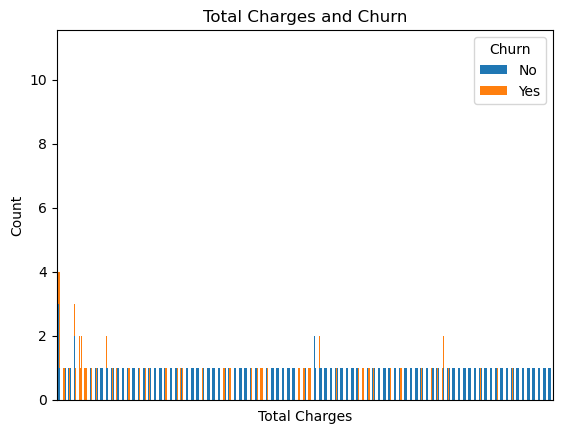

In [36]:
count_data = df.groupby(["TotalCharges", "Churn"]).size().reset_index(name="Count")
pivot_data = count_data.pivot(index="TotalCharges", columns="Churn", values="Count")
plt.figure(figsize=(50,10))
pivot_data.plot(kind="bar", stacked=True)
plt.xlabel("Total Charges")
plt.xticks([])
plt.ylabel("Count")
plt.title("Total Charges and Churn")
plt.show()

In [37]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [38]:
label_encoder = LabelEncoder()

In [39]:
df["gender"] = label_encoder.fit_transform(df["gender"])
df["Partner"] = label_encoder.fit_transform(df["Partner"])
df["Dependents"] = label_encoder.fit_transform(df["Dependents"])
df["PhoneService"] = label_encoder.fit_transform(df["PhoneService"])
df["MultipleLines"] = label_encoder.fit_transform(df["MultipleLines"])
df["InternetService"] = label_encoder.fit_transform(df["InternetService"])
df["OnlineSecurity"] = label_encoder.fit_transform(df["OnlineSecurity"])
df["OnlineBackup"] = label_encoder.fit_transform(df["OnlineBackup"])
df["DeviceProtection"] = label_encoder.fit_transform(df["DeviceProtection"])
df["TechSupport"] = label_encoder.fit_transform(df["TechSupport"])
df["StreamingTV"] = label_encoder.fit_transform(df["StreamingTV"])
df["StreamingMovies"] = label_encoder.fit_transform(df["StreamingMovies"])
df["Contract"] = label_encoder.fit_transform(df["Contract"])
df["PaperlessBilling"] = label_encoder.fit_transform(df["PaperlessBilling"])
df["PaymentMethod"] = label_encoder.fit_transform(df["PaymentMethod"])
df["Churn"] = label_encoder.fit_transform(df["Churn"])

In [40]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [42]:
X = df.drop("Churn", axis=1)
Y = df.Churn

In [43]:
scaler = MinMaxScaler()

In [44]:
X = scaler.fit_transform(X)

In [45]:
X

array([[0.        , 0.        , 1.        , ..., 0.66666667, 0.11542289,
        0.0012751 ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.38507463,
        0.21586661],
       [1.        , 0.        , 0.        , ..., 1.        , 0.35422886,
        0.01031041],
       ...,
       [0.        , 0.        , 1.        , ..., 0.66666667, 0.11293532,
        0.03780868],
       [1.        , 1.        , 1.        , ..., 1.        , 0.55870647,
        0.03321025],
       [1.        , 0.        , 0.        , ..., 0.        , 0.86965174,
        0.78764136]])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True ,random_state=101)

In [47]:
smote = SMOTE(random_state=42)

In [48]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [49]:
model = xgb.XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))

In [50]:
model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [51]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.81      1026
           1       0.52      0.68      0.59       383

    accuracy                           0.74      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.74      0.75      1409



In [53]:
cm = confusion_matrix(y_test, y_pred)

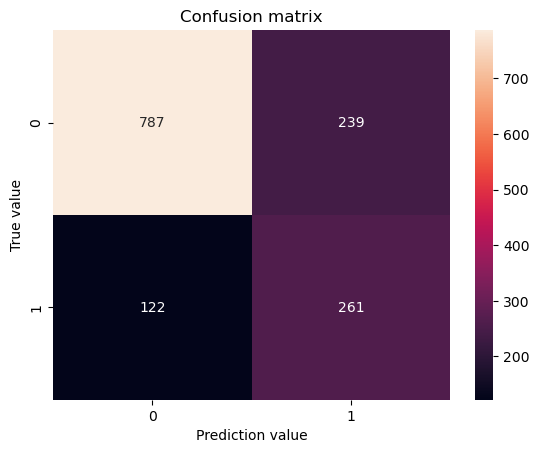

In [54]:
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.xlabel("Prediction value")
plt.ylabel("True value")
plt.show()

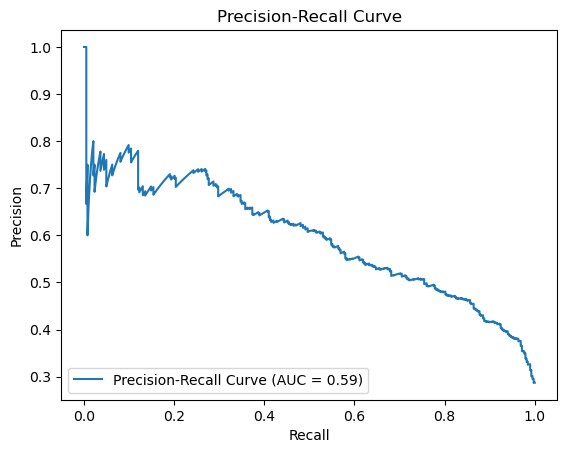

In [55]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label="Precision-Recall Curve (AUC = {:.2f})".format(pr_auc))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()